# Predicting Missing Values

This notebook is the beginning process for a planned blog post testing different algorithms for effectiveness on filling missing values by building predictive models.

### To-do:
- Collect datasets with missing values
- Try missing at random/missing completely at random
- Compare against actual values that were artificially removed
- Add additional algorithms
    - Do classification in addition to just regression
- Generate plots of results

In [1]:
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

print(time.strftime('%Y/%m/%d %H:%M'))
print('OS:', sys.platform)
print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)

# Formatting for seaborn plots
sns.set_context('notebook', font_scale=1.1)
sns.set_style('ticks')

# Displays all dataframe columns
pd.set_option('display.max_columns', None)

%matplotlib inline

2018/03/03 21:15
OS: win32
Python: 3.5.3 | packaged by conda-forge | (default, May 12 2017, 16:16:49) [MSC v.1900 64 bit (AMD64)]
NumPy: 1.12.1
Pandas: 0.20.2


In [2]:
dataset = datasets.load_breast_cancer()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

df['label'] = dataset.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


C:\Anaconda3\lib\site-packages\missingno\missingno.py:232: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor((1, 1, 1))


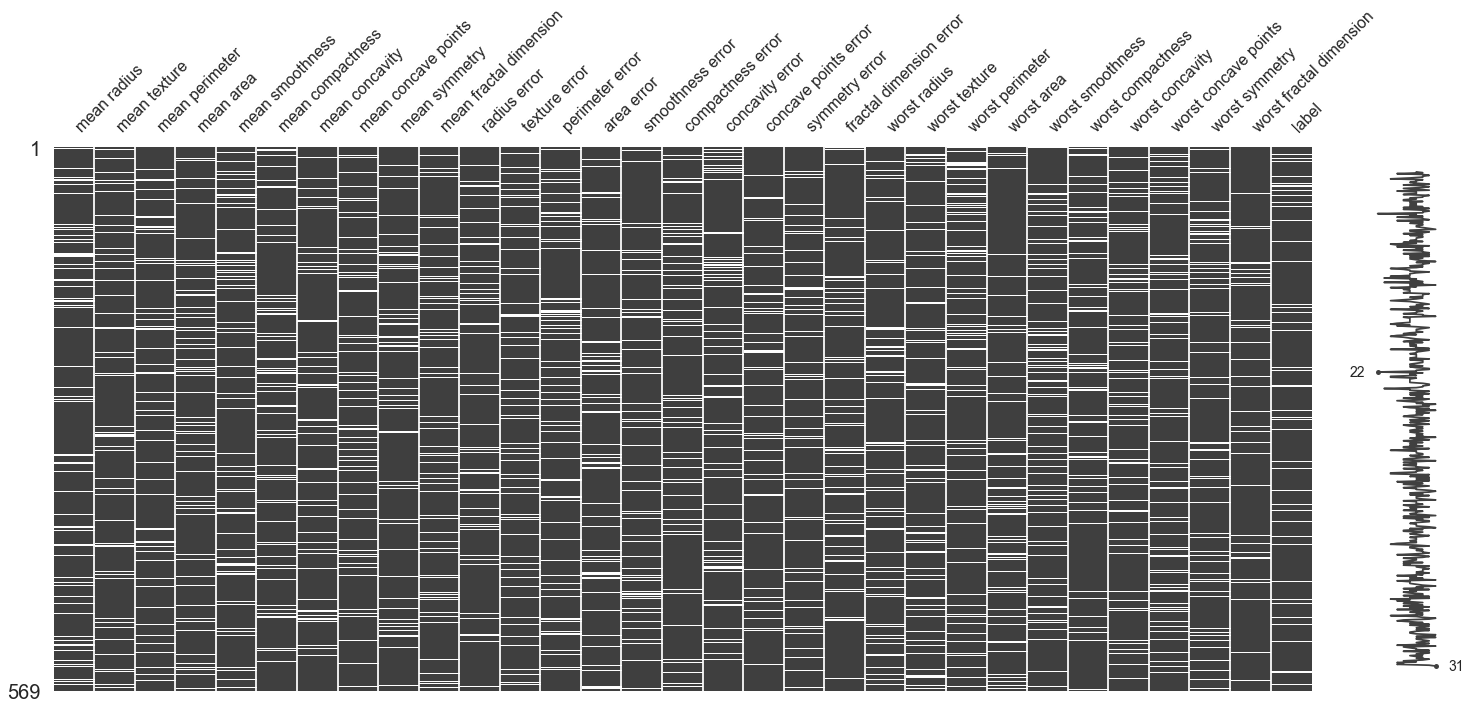

In [3]:
df = df.mask(np.random.random(df.shape) < .1)

# Plotting missing values
import missingno as msno  # Visualizes missing values
msno.matrix(df)

In [4]:
def percent_missing(dataframe):
    """
    Prints the percentage of missing values for each column in a dataframe
    """
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = df.isnull().values.sum(axis=0)
    pctMissing = sumMissing / df.shape[0]
    
    # Looping through and printing out each columns missing value percentage
    print('Percent Missing Values:', '\n')
    for idx, col in enumerate(df.columns):
        print('{0}: {1:.2f}%'.format(col, pctMissing[idx]*100))

        
percent_missing(df)

Percent Missing Values: 

mean radius: 11.60%
mean texture: 8.79%
mean perimeter: 9.67%
mean area: 10.02%
mean smoothness: 11.42%
mean compactness: 10.37%
mean concavity: 8.61%
mean concave points: 10.37%
mean symmetry: 9.14%
mean fractal dimension: 10.54%
radius error: 9.14%
texture error: 9.49%
perimeter error: 11.60%
area error: 10.02%
smoothness error: 9.31%
compactness error: 9.67%
concavity error: 10.72%
concave points error: 8.44%
symmetry error: 8.96%
fractal dimension error: 9.67%
worst radius: 10.19%
worst texture: 10.72%
worst perimeter: 11.78%
worst area: 9.67%
worst smoothness: 12.48%
worst compactness: 10.02%
worst concavity: 10.54%
worst concave points: 11.42%
worst symmetry: 10.37%
worst fractal dimension: 6.15%
label: 7.73%


In [5]:
def predict_missing_summary(data, model, correlationThresh=0.5, cross_validations=3, modelName='model'):
    """
    Takes a dataframe and model and gathers summary statistics on effectiveness of predicting
    missing values
    """
    from sklearn.model_selection import cross_val_score
    
    # Stats to gather
    timeSeconds = []
    crossValScore = []
    r2orAccuracy = []
    
    # Actually predicting per column
    def predict_missing_values(data, column, model, correlationThresh, cross_validations):
        """
        Performs the predictions on individual columns
        """
        
        start_time = time.time()
        
        # Skipping classification features
        num_unique_values = len(np.unique(data[column]))
        if num_unique_values < 25 or data[column].dtype.name == 'category':
            return
        
        # Calculating the highly correlated columns to use for the model
        highlyCorrelated = abs(data.corr()[column]) >= correlationThresh
    
        # Exiting the function if there are not any highly correlated columns found
        if highlyCorrelated.sum() < 2:  # Will always be 1 because of correlation with self
            print('Error: No correlated variables found. Re-try with less a lower correlation threshold')
            return  # Exits the function
        highlyCorrelated = data[data.columns[highlyCorrelated]]
        highlyCorrelated = highlyCorrelated.dropna(how='any')  # Drops any missing records

        # Creating the X/y objects to use for the
        y = highlyCorrelated[column]
        X = highlyCorrelated.drop(column, axis=1)
    
        # Evaluating the effectiveness of the model
        cvScore = np.mean(cross_val_score(model, X, y, cv=cross_validations))
        crossValScore.append(cvScore)

        # Fitting the model for predictions
        model.fit(X, y)
        r2orAccuracy.append(model.score(X, y))
        
        end_time = time.time()
        timeSeconds.append(end_time - start_time)

        
    data.apply(lambda col: predict_missing_values(data, col.name, model, correlationThresh, cross_validations))
    
    results = pd.DataFrame({'Cross Val Mean': np.mean(crossValScore),
                            'Cross Val Std': np.std(crossValScore),  
                            'R2 Mean': np.mean(r2orAccuracy),
                            'R2 Std': np.std(r2orAccuracy),
                            'Execution Time (s) Mean': np.mean(timeSeconds),
                            'Execution Time (s) Std': np.std(timeSeconds)},
                           index=[modelName])
    return results


from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
predict_missing_summary(df, knn, correlationThresh=0.3, modelName='k-NN')

,Cross Val Mean,Cross Val Std,Execution Time (s) Mean,Execution Time (s) Std,R2 Mean,R2 Std
k-NN,0.281179,0.420663,0.01865,0.006174,0.612793,0.222876


In [6]:
def compile_results(data, correlationThresh=0.4, cross_validations=3):
    """
    Outputs a data frame of the results for testing predicting 
    missing values using multiple algorithms
    """
    from sklearn import linear_model
    from sklearn import ensemble
    from sklearn import neighbors
    
    linear_regression = linear_model.LinearRegression()
    linearResults = predict_missing_summary(data, linear_regression, correlationThresh,
                                            cross_validations, modelName='Linear Regression')
    
    knn = neighbors.KNeighborsRegressor()
    knnResults = predict_missing_summary(data, knn, correlationThresh,
                                         cross_validations, modelName='k-NN')
    
    rf = ensemble.RandomForestRegressor()
    rfResults = predict_missing_summary(data, rf, correlationThresh,
                                         cross_validations, modelName='Random Forest')
    
    gbt = ensemble.GradientBoostingRegressor()
    gbtResults = predict_missing_summary(data, gbt, correlationThresh,
                                         cross_validations, modelName='Gradient Boosted Trees')
    
    results = linearResults.append(knnResults).append(rfResults).append(gbtResults)
    
    return results
    
    
compile_results(df, correlationThresh=0.3)

,Cross Val Mean,Cross Val Std,Execution Time (s) Mean,Execution Time (s) Std,R2 Mean,R2 Std
Linear Regression,-0.129518,3.771557,0.021170,0.007476,0.904262,0.157508
k-NN,0.281179,0.420663,0.018649,0.006173,0.612793,0.222876
Random Forest,0.626711,0.229591,0.103328,0.021981,0.949006,0.042400
Gradient Boosted Trees,0.666829,0.217549,0.150203,0.029078,0.989455,0.026422
